In [1]:
using BeamLib: IsotropicArray, steerphi, music
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steerphi(pa, fc, Θ[1]).*s1 + steerphi(pa, fc, Θ[2]).*s2
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X)[2] * X*X'

# MUSIC spectrum
ϕaxis = LinRange(-90, 90, 360)
P = music.(Ref(pa), Ref(Rxx), Ref(d), Ref(fc), deg2rad.(ϕaxis))

360-element Vector{ComplexF64}:
  454.3696860300837 + 0.0im
  451.8516460592687 + 0.0im
  444.4223095039681 + 0.0im
 432.44249045758835 + 0.0im
 416.47094291482716 + 0.0im
  397.2085624361894 + 0.0im
 375.43421851811667 + 0.0im
  351.9417514656826 + 0.0im
 327.48587294099934 + 0.0im
 302.74175183623294 + 0.0im
                    ⋮
  533.8977349761516 + 0.0im
   488.693687892533 + 0.0im
 454.00640747252777 + 0.0im
  427.4626259730883 + 0.0im
  407.4400508718079 + 0.0im
 392.82448880977995 + 0.0im
 382.86139140411944 + 0.0im
  377.0645584699221 + 0.0im
 375.16153909765745 + 0.0im

In [2]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(abs.(P)).indices]

2-element Vector{Float64}:
  9.777158774373248
 79.97214484679665

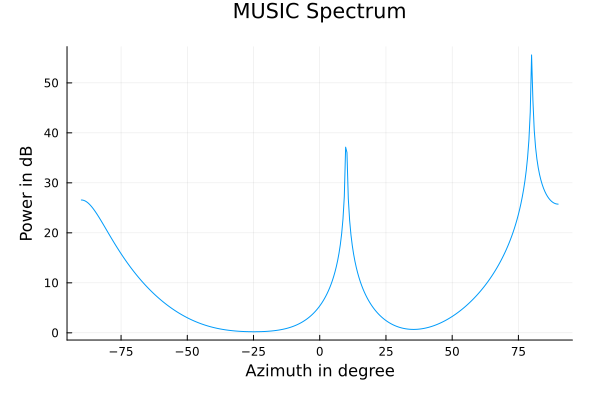

In [3]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(abs.(P)))
plot!(title="MUSIC Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")